In [217]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [218]:
def floatCheck(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

with open("data/Merged.csv") as f:
    data = csv.reader(f)
    data = np.array(list(data))
    data = np.concatenate((data[:, :10], data[:, 12:]), axis=1)
headers = list(data[0][1:])
data = data[1:, 1:]
data = [[float(x) if floatCheck(x) else np.nan for x in row] for row in data]
print(headers)

[' Voice & Accountability', ' Pol. Stability & Abs. of Violence', '  Govt. Effectiveness', '   Regulatory Quality', '            Rule of Law', ' Control of Corruption', ' Total Tests', ' Total Deaths', ' Total Cases', ' Total Vaccinations', ' Fully Vaccinated']


In [219]:
lenHeaders = len(headers)
data = np.asarray([row for row in data if not any(np.isnan(x) for x in row)])
print(data)

[[5.79644685e-01 6.12006594e-01 2.50000000e-01 ... 2.00173000e+05
  2.10103900e+06 9.61013000e+05]
 [2.10754451e-01 8.07477552e-01 7.92186394e-01 ... 7.42109000e+05
  2.15485280e+07 8.83225600e+06]
 [6.50379879e-01 5.71085757e-01 4.37056626e-01 ... 5.33262900e+06
  6.88747460e+07 2.98540900e+07]
 ...
 [6.52763698e-01 6.72719451e-01 6.64675941e-01 ... 2.97661300e+06
  2.57822590e+07 1.45613950e+07]
 [5.08528283e-01 5.97392243e-01 3.07840891e-01 ... 2.10195000e+05
  1.08660700e+06 6.91735000e+05]
 [2.37496624e-01 2.83331943e-01 0.00000000e+00 ... 1.35337000e+05
  6.64044000e+06 2.83054000e+06]]


In [220]:
# df = pd.Series()
columns = data.T
X_train, X_test, y_train, y_test = train_test_split(data[:, 1:], columns[1], test_size=0.2)
clf = Lasso(alpha=1)
clf.fit(X_train, y_train)
r_squared = r2_score(clf.predict(X_test), y_test)
print(r_squared)
print(clf.coef_)


-5.50558966668591
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.50623010e-10 -3.06706610e-07 -4.16403157e-09
 -2.03645783e-09  4.42412046e-09]


/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.906e+00, tolerance: 3.985e-04
  model = cd_fast.enet_coordinate_descent(


In [221]:
clf = Ridge(alpha=1)
clf.fit(X_train, y_train)
r_squared = r2_score(clf.predict(X_test), y_test)
print(r_squared)
print(clf.coef_)

0.8819226114596892
[ 6.54291762e-01  2.21079728e-02  4.96501698e-02  4.24041919e-02
  9.10927460e-02  9.13646090e-11  6.10579297e-08 -2.28213357e-09
  3.03092447e-10 -7.25941467e-10]


/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.07268e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [222]:
clf = LinearRegression()
clf.fit(X_train, y_train)
r_squared = r2_score(clf.predict(X_test), y_test)
print(r_squared)
print(clf.coef_)

1.0
[ 1.00000000e+00  1.75778135e-16  2.93735001e-16  3.23973415e-16
  3.55758056e-17 -1.16939692e-24 -4.03326449e-20  6.94842309e-22
  2.37581227e-22 -5.53037346e-22]


In [223]:
ridgeSimMatrix = [headers.copy()]
for x in range(lenHeaders):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray([row for i,row in enumerate(columns) if i!=x]).T, columns[x], test_size=0.2)
    clf = Ridge(alpha=1)
    clf.fit(X_train, y_train)
    ridgeSimRow = [ridgeSimMatrix[0][x]]
    coefs = list(clf.coef_)
    for i in range(lenHeaders-1):
        if x > 5 and i > 5:
            ridgeSimRow.append(0)
        elif x <= i:
            ridgeSimRow.append(coefs[i])
        else:
            ridgeSimRow.append(ridgeSimMatrix[i+1][x])
    ridgeSimMatrix.append(ridgeSimRow)
for i in range(lenHeaders+1):
    ridgeSimMatrix[i].insert(i, 1)
ridgeMatrixFramed = pd.DataFrame(ridgeSimMatrix)
print(ridgeMatrixFramed)

                                    0                        1   \
0                                    1   Voice & Accountability   
1               Voice & Accountability                        1   
2    Pol. Stability & Abs. of Violence                 0.241350   
3                  Govt. Effectiveness                 0.059511   
4                   Regulatory Quality                 0.288716   
5                          Rule of Law                 0.129684   
6                Control of Corruption                 0.139479   
7                          Total Tests                -0.000000   
8                         Total Deaths                -0.000000   
9                          Total Cases                 0.000000   
10                  Total Vaccinations                 0.000000   
11                    Fully Vaccinated                -0.000000   

                                    2                      3   \
0    Pol. Stability & Abs. of Violence    Govt. Effectiveness  

/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.23848e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.63033e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.42887e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.45708e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridg

In [224]:
lassoSimMatrix = [headers.copy()]
for x in range(lenHeaders):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray([row for i,row in enumerate(columns) if i!=x]).T, columns[x], test_size=0.2)
    clf = Lasso(alpha=0.01)
    clf.fit(X_train, y_train)
    lassoSimRow = [lassoSimMatrix[0][x]]
    coefs = list(clf.coef_)
    for i in range(lenHeaders-1):
        if x > 5 and i > 5:
            lassoSimRow.append(0)
        elif x <= i:
            lassoSimRow.append(coefs[i])
        else:
            lassoSimRow.append(lassoSimMatrix[i+1][x])
    lassoSimMatrix.append(lassoSimRow)
for i in range(lenHeaders+1):
    lassoSimMatrix[i].insert(i, 1)
lassoMatrixFramed = pd.DataFrame(lassoSimMatrix)
print(lassoMatrixFramed)

/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.538e+00, tolerance: 4.847e-04
  model = cd_fast.enet_coordinate_descent(
/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.325e+00, tolerance: 3.919e-04
  model = cd_fast.enet_coordinate_descent(
/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+00,

                                    0                        1   \
0                                    1   Voice & Accountability   
1               Voice & Accountability                        1   
2    Pol. Stability & Abs. of Violence                 0.112931   
3                  Govt. Effectiveness                 0.147329   
4                   Regulatory Quality                 0.164161   
5                          Rule of Law                 0.000000   
6                Control of Corruption                 0.160865   
7                          Total Tests                -0.000000   
8                         Total Deaths                -0.000000   
9                          Total Cases                 0.000000   
10                  Total Vaccinations                 0.000000   
11                    Fully Vaccinated                -0.000000   

                                    2                      3   \
0    Pol. Stability & Abs. of Violence    Govt. Effectiveness  

/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.071e+13, tolerance: 6.153e+11
  model = cd_fast.enet_coordinate_descent(
/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.692e+14, tolerance: 6.389e+14
  model = cd_fast.enet_coordinate_descent(
/home/adam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.912e+14,

In [225]:
linRegSimMatrix = [headers.copy()]
for x in range(lenHeaders):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray([row for i,row in enumerate(columns) if i!=x]).T, columns[x], test_size=0.2)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    linRegSimRow = [linRegSimMatrix[0][x]]
    coefs = list(clf.coef_)
    for i in range(lenHeaders-1):
        if x > 5 and i > 5:
            linRegSimRow.append(0)
        elif x <= i:
            linRegSimRow.append(coefs[i])
        else:
            linRegSimRow.append(linRegSimMatrix[i+1][x])
    linRegSimMatrix.append(linRegSimRow)
for i in range(lenHeaders+1):
    linRegSimMatrix[i].insert(i, 1)
linRegMatrixFramed = pd.DataFrame(linRegSimMatrix)
print(incr)
print(linRegMatrixFramed)

0
                                    0                        1   \
0                                    1   Voice & Accountability   
1               Voice & Accountability                        1   
2    Pol. Stability & Abs. of Violence                 0.412841   
3                  Govt. Effectiveness                -0.069657   
4                   Regulatory Quality                 0.390737   
5                          Rule of Law                 0.193882   
6                Control of Corruption                 0.073303   
7                          Total Tests                -0.000000   
8                         Total Deaths                -0.000000   
9                          Total Cases                 0.000000   
10                  Total Vaccinations                 0.000000   
11                    Fully Vaccinated                -0.000000   

                                    2                      3   \
0    Pol. Stability & Abs. of Violence    Govt. Effectiveness

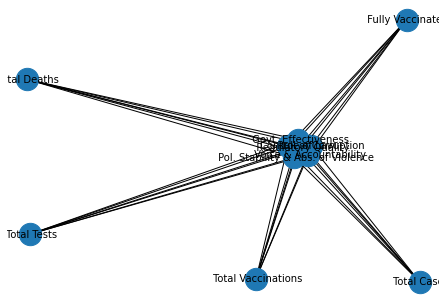

In [226]:
adjMatrix = [[x*20 if i < j else 0 for j, x in enumerate(row)] for i, row in enumerate(np.asarray(ridgeSimMatrix)[1:, 1:].astype(np.float))]
G = nx.from_numpy_matrix(np.matrix(adjMatrix))

layout = nx.spring_layout(G)
lab_node = dict(zip(G.nodes, headers))
nx.draw(G, layout)
nx.draw_networkx_nodes(G, layout, node_size=500)
widths = list(nx.get_edge_attributes(G, "weight").values())
nx.draw_networkx_edges(G, layout, width=widths)
nx.draw_networkx_labels(G, layout, labels=lab_node, font_size=10, font_family='sans-serif')
plt.show()

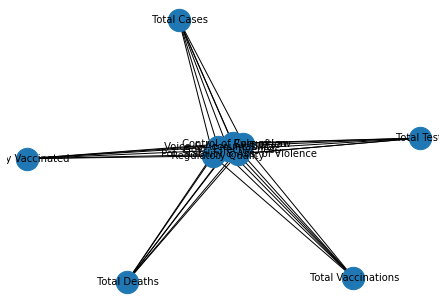

In [227]:
adjMatrix = [[x*20 if i < j else 0 for j, x in enumerate(row)] for i, row in enumerate(np.asarray(lassoSimMatrix)[1:, 1:].astype(np.float))]
G = nx.from_numpy_matrix(np.matrix(adjMatrix))

layout = nx.spring_layout(G)
lab_node = dict(zip(G.nodes, headers))
nx.draw(G, layout)
nx.draw_networkx_nodes(G, layout, node_size=500)
widths = list(nx.get_edge_attributes(G, "weight").values())
nx.draw_networkx_edges(G, layout, width=widths)
nx.draw_networkx_labels(G, layout, labels=lab_node, font_size=10, font_family='sans-serif')
plt.show()

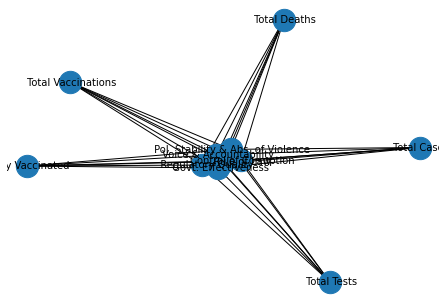

In [228]:
adjMatrix = [[x*20 if i < j else 0 for j, x in enumerate(row)] for i, row in enumerate(np.asarray(linRegSimMatrix)[1:, 1:].astype(np.float))]
G = nx.from_numpy_matrix(np.matrix(adjMatrix))

layout = nx.spring_layout(G)
lab_node = dict(zip(G.nodes, headers))
nx.draw(G, layout)
nx.draw_networkx_nodes(G, layout, node_size=500)
widths = list(nx.get_edge_attributes(G, "weight").values())
nx.draw_networkx_edges(G, layout, width=widths)
nx.draw_networkx_labels(G, layout, labels=lab_node, font_size=10, font_family='sans-serif')
plt.show()